In [6]:
import seaborn as sns
import scanpy as sc
import umap

from grnndata import GRNAnnData, read_h5ad
from grnndata import utils 

import bengrn as ben

from scipy import stats
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2


In [274]:
grn = read_h5ad('../../scPrint/notebooks/assessments/grn_b_cell.h5ad')
grn

GRnnData object with n_obs × n_vars = 1331 × 2934
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', 'organism_ontology_term_id', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'description', 'synonyms', 'organism_id', 'public_source_id', 'created_by_id', 'mt', 'ribo', 'hb', 'organism', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'centrality', 'TFs'
    uns: 'hvg', 'unseen

In [279]:
benchmark = ben.BenGRN(grn)

base enrichment
Central
Top central genes: []


2024-03-21 13:55:13,294 [WARNING] Duplicated values found in preranked stats: 43.18% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]
Targets
['celltype.gmt__Classical Monocytes', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Ductal cells', 'celltype.gmt__Secretory cell', 'celltype.gmt__Immune cells', 'celltype.gmt__Neutrophils']
TF specific enrichment


2024-03-21 13:55:14,351 [WARNING] Duplicated values found in preranked stats: 98.33% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:14,456 [WARNING] Duplicated values found in preranked stats: 99.25% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:14,569 [WARNING] Duplicated values found in preranked stats: 98.98% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:14,680 [WARNING] Duplicated values found in preranked stats: 97.82% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:14,775 [WARNING] Duplicated values found in preranked stats: 98.91% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:14,879 [WARNING] Duplicated values found in preranked stats: 98.47% of genes
The order of those genes w

found!  0__BDP1
0    1.02175
Name: NES, dtype: object


found!  0__USF1
0    1.005218
Name: NES, dtype: object




2024-03-21 13:55:15,164 [WARNING] Duplicated values found in preranked stats: 99.25% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:15,264 [WARNING] Duplicated values found in preranked stats: 98.64% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:15,360 [WARNING] Duplicated values found in preranked stats: 99.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:15,497 [WARNING] Duplicated values found in preranked stats: 98.64% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:15,619 [WARNING] Duplicated values found in preranked stats: 99.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-21 13:55:15,709 [WARNING] Duplicated values found in preranked stats: 99.25% of genes
The order of those genes w

found!  0__BDP1
0    1.021809
Name: NES, dtype: object




2024-03-21 13:55:16,321 [WARNING] Duplicated values found in preranked stats: 99.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found some significant results for  15.0 % TFs

omnipath overlap
intersection of 2125 genes
intersection pct: 0.7242672119972734
precision:  0.0020786802591716237 
recall:  0.00035294294339395944


100%|██████████| 100/100 [00:04<00:00, 22.52it/s]


Area Under Precision-Recall Curve (AUPRC):  -3.2111817799026126e-06


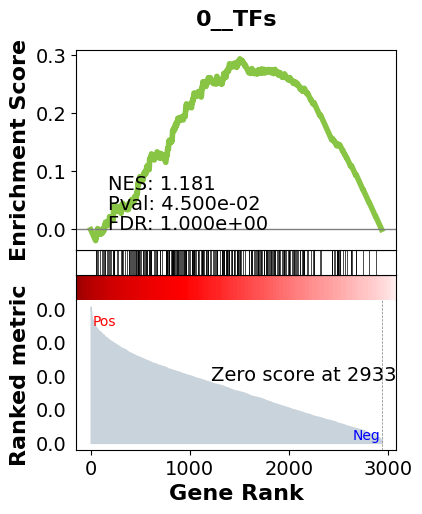

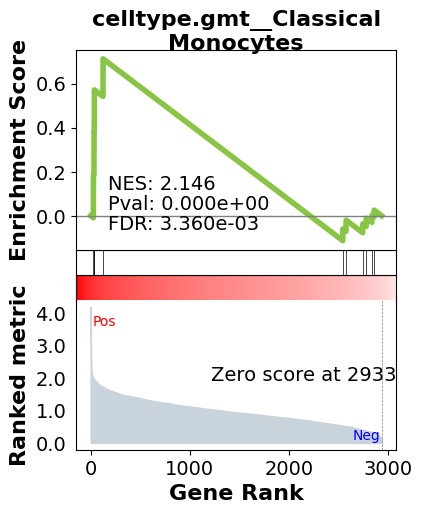

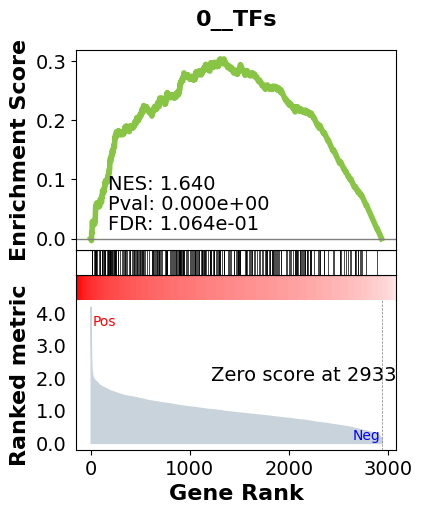

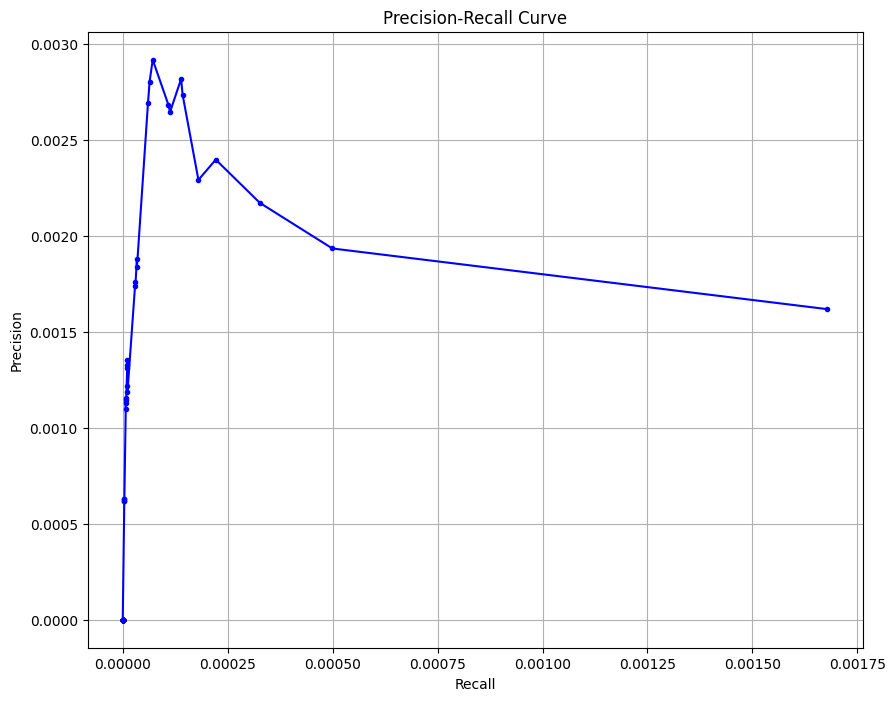

In [280]:
benchmark.scprint_benchmark()

In [281]:
res = utils.enrichment(grn, of="Targets", gene_sets=[
        {"TFs": utils.TF},
        utils.file_dir + "/celltype.gmt",
    ],
    doplot=False,
    top_k=10)

2024-03-21 13:56:04,458 [WARNING] Duplicated values found in preranked stats: 43.18% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


['celltype.gmt__Classical Monocytes', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Ductal cells', 'celltype.gmt__Secretory cell', 'celltype.gmt__Immune cells', 'celltype.gmt__Neutrophils']


In [285]:
# this GRN is specifically not looking at B cells stuff
res.res2d[res.res2d["FDR q-val"]<0.05].sort_values("NES", ascending=False)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
2,prerank,celltype.gmt__Classical Monocytes,0.713132,2.146309,0.0,0.00336,0.004,4/10,4.29%,LYZ;CD3E;S100A8;S100A9
12,prerank,celltype.gmt__Macrophages,-0.591188,-1.826578,0.009524,0.042124,0.147,6/7,15.00%,CCL18;CD68;MRC1;CD14;CD163;MSR1
11,prerank,celltype.gmt__Retinal pigment epithelial cells,-0.641393,-1.830469,0.009434,0.04524,0.143,6/6,36.03%,BEST1;CLU;EFEMP1;BMP4;TMEM98;BMP2
9,prerank,celltype.gmt__Alveolar macrophages,-0.432044,-1.850932,0.0,0.045087,0.13,13/13,57.02%,MARCO;IL1B;G0S2;CCL3;S100A4;CD36;MRC1;IL18;MPP...
8,prerank,celltype.gmt__Monocytes,-0.863528,-1.864474,0.00304,0.047639,0.123,3/3,13.77%,FCGR3B;CD14;FCGR3A
7,prerank,celltype.gmt__Enteroendocrine cells,-0.796246,-1.906725,0.007491,0.039952,0.09,4/4,20.52%,NUCB2;FABP5;FFAR4;VEGFA
6,prerank,celltype.gmt__Pro-B cells,-0.606081,-1.914565,0.0,0.044783,0.086,7/7,39.57%,TCL1A;HLA-DQB1;HLA-DQA1;IGLL5;CD27;CD79A;CD79B
5,prerank,celltype.gmt__Keratinocytes,-0.654372,-1.975068,0.004651,0.03016,0.049,6/6,34.73%,LCN2;PI3;S100A14;CXCL1;REL;LAMA5
4,prerank,celltype.gmt__Pre-B cells,-0.606288,-2.074573,0.0,0.019193,0.026,8/8,39.57%,TCL1A;HLA-DQB1;HLA-DQA1;IGLL5;CD27;CD79A;PCDH9...
3,prerank,celltype.gmt__Kupffer cells,-0.362364,-2.096304,0.0,0.021934,0.022,16/22,16.53%,MARCO;IL1B;CD68;MNDA;VSIG4;FOLR2;IRF7;TNF;DNAS...


In [ ]:
plot_subgraph_of(grn, 'IRF4', using="Targets", max_edges=100, plot_size=15)


In [ ]:

# Calculate the sum of non-zero elements for TFs and non-TFs
TFs_sum = (grn.varp['GRN'][grn.var['TFs']]!=0).sum(1)
non_TFs_sum = (grn.varp['GRN'][~grn.var['TFs']]!=0).sum(1)

# Perform a statistical test to check if they come from the same distribution
ks_result = stats.ks_2samp(TFs_sum, non_TFs_sum)

# Compute fold increase and perform a statistical test
fold_increase = TFs_sum.mean() / non_TFs_sum.mean()
fold_increase_test = stats.ttest_ind(TFs_sum, non_TFs_sum)

ks_result, fold_increase, fold_increase_test

In [ ]:
utils.enrichment(grn, of='Regulators')

In [ ]:
utils.enrichment(grn, of='Regulators')

In [ ]:
utils.enrichment(grn, of='Regulators')

In [ ]:
benchmark.do_tests()

In [ ]:
utils.plot_cluster(genie3_grn, stretch=5, min_dist=0.3, spread=1)

In [ ]:
genie3_grn = ben.compute_genie3(grn.copy())
utils.metrics(genie3_grn)a

In [ ]:
def fileToList(filename, strconv=lambda x: x):
    """
    loads an input file with a\\n b\\n.. into a list [a,b,..]
    """
    with open(filename) as f:
        return [strconv(val[:-1]) for val in f.readlines()]
TF = fileToList("../../../GRnnData/grnndata/TF.txt")

In [ ]:
umap.UMAP(n_neighbors=40,
min_dist=0.00001,
precomputed_knn=tgrn.obsp['GRN'],
).fit(tgrn.X)